# Exercise 8

#### Vorgaben

Ihr dürft für die Lösung der Übung zusammenarbeiten, so lange sich eure **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.

#### Abgabe

Arbeite auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2021`, zu welchem du @michael.graber und @florian.schaerer als *Maintainer* hinzufügst. Committe regelmässig. Als Abgabe gilt dein **letzter Commit bis Sonntag, 28. November 2021, 23:59:59 Uhr**.

#### Hinweise
- Der *Code* muss im Container zum Repo von Anfang bis Ende durchlaufen. Es wird nur funktionsfähiger Code bewertet.  
- Beschrifte sämtliche Achsen (Bezeichnung und Einheit wenn möglich).
- Ergänze den Plot mit zusätzlicher Beschriftung falls dies notwendig ist zum Verständnis des Plots.
- Diskutiere jeden Plot und beginne dabei mit einer Beschreibung dessen was der Plot zeigt.
- Versuche eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichst du bloss mit performantem *Code*.

## FINAL TODOs: 
- Plots beschriften/betiteln, evtl. vergrössern, Metriken entfernen
- Beschriftungen überprüfen
- Antworten überprüfen
- Performanz des Codes überprüfen - gehts noch einfacher
- Code-Kommentare überprüfen, evtl. hinzufügen

In [53]:
#plots single grayscale image (shows title and removes axes)
def plot_img(img, title, ax):  
    _ = ax.imshow(img, cmap="gray");
    _ = ax.set_title(title)
    _ = ax.axis("off")

### Aufgabe 1 (8 Punkte)

Lade das Bild `Turing.jpg` aus dem Verzeichnis dieses Übungsblatts in ein Numpy Array.

- Wie viel Speicherplatz braucht das Array?
- Was ist seine Form?
- Was ist seine Dimensionalität?  
- Wie viel Speicherplatz braucht ein einzelnes Elmement?
- Wie viele Elemente hat das Array?

Vergleiche Anzahl Elemente und benötigter Speicherplatz.
Machen diese Informationen Sinn zusammen? Begründe.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('seaborn-muted')

# read image
img = plt.imread("Turing.jpg")
# convert to numpy array
data = np.asarray(img)
# print answers
print("Grösse in Bytes (Speicherplatz): "+str(data.nbytes)) 
print("Form: "+str(data.shape)) 
print("Dimensionalität: "+str(data.ndim))
print("Grösse eines einzelnen Elements in Bytes: "+str(data.itemsize))
print("Anzahl Elemente: "+str(data.size))

Grösse in Bytes (Speicherplatz): 188000
Form: (470, 400)
Dimensionalität: 2
Grösse eines einzelnen Elements in Bytes: 1
Anzahl Elemente: 188000


Da das Array 188'000 Elemente mit je 1 Byte Grösse besitzt, macht es Sinn dass das Array 188'000 Bytes an Speicher benötigt.

### Aufgabe 2 (4 Punkte)

Zeichne das Bild. Verwende Graustufen zur Kodierung der Pixelwerte.

Kennst du Alan Turing? Wer war er? Nenne eine Errungenschaft oder eine Arbeit für die er bekannt ist (1-2 Sätze genügen).

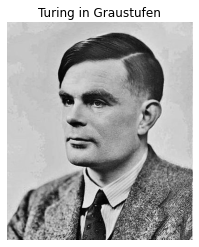

In [52]:
#show image in grayscale
fig, ax = plt.subplots(1,1, figsize=(10,4))
plot_img(img, "Turing in Graustufen", ax)

Ja ich habe bereits von ihm im Modul "Einführung Theoretische Informatik" gehört. Er war ein brillanter Logiker, Mathematiker und Informatiker der zum Beispiel eine universelle Turing-Maschine entwarf, welche mithilfe zahlreicher unterschiedlicher Programme eine grosse Anzahl an Probleme lösen konnte (was zur damaligen Zeit revolutionär war, da sonst für jedes Problem eine eigene Maschine entworfen werden musste)

### Aufgabe 3 (2 Punkte)

Flippe das Bild an der Diagonalen von oben links bis unten rechts und zeichne es erneut.

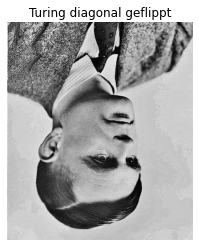

In [51]:
# flip image diagonally - it basically combines 'flipud' and 'fliplr', which flips numpy-arrays vertically and horizontally
img_flipped = np.flip(img)

#display grayscale image
fig, ax = plt.subplots(1,1, figsize=(10,4))
plot_img(img_flipped, "Turing diagonal geflippt", ax)

### Aufgabe 4 (6 Punkte)

Zeichne ein Histogramm der Pixelwerte.  

Zwischen welchen Werten streuen die Pixelwerte?  
Was ist eine sinnvoll gewählte Anzahl *Bins*? Begründe. 

Zeichne Median und Mittelwert mit ins Histogramm als vertikale Linien und beschrifte diese.

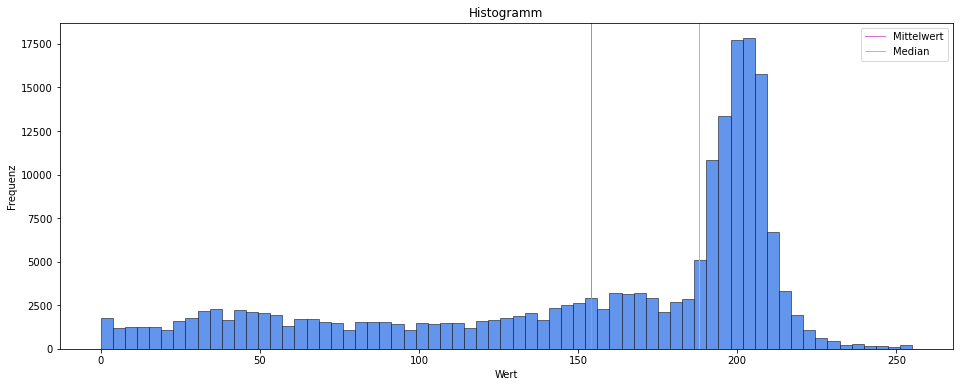

In [4]:
# flatten numpy array
flatten_data = data.flatten()

# histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
_ = ax.hist(flatten_data, bins="scott", color="cornflowerblue", edgecolor="black", linewidth=0.5)
_ = ax.set_title("Histogramm")

# calc mean and median
mean = np.mean(flatten_data)
median = np.median(flatten_data)

# show mean and median line
_ = ax.axvline(mean, color="orchid", linewidth=1, label="Mittelwert")
_ = ax.axvline(median, color="tan", linewidth=1, label="Median")

# show histogram legend
_ = ax.legend()

# histogram labels
_ = ax.set_ylabel("Frequenz")
_ = ax.set_xlabel("Wert")

Die Pixelwerte sind zwischen 0 und 255 verstreut. Um die Anzahl Bins zu bestimmen, habe ich den 'Scott Estimator' angewendet. Ich habe auch anderere Estimators ausprobiert, fand diesen jedoch ziemlich passend, da er einerseits die Faustregel erfüllt (mind. 20 Elemente im grössten Bin) und auch sehr anschaulich ist. Der Scott Estimator hat hier 65 als optimal Anzahl Bins gewählt. 
Ohne Estimators hätte ich erst 255 Bins gewählt - damit hätte man genaue Angaben für jeden Pixelwert, jedoch wäre das Histogramm mit so vielen Bins nicht mehr sehr anschaulich gewesen... heisst ich hätte diesen Wert nochmal halbiert (also 127, oder nochmals 64), damit jeder Bin 2 (oder 3) Werte hat und das Histogramm noch anschaulicher wird. (Je weniger breit der Range eines Bins ist, desto aussagekräftiger ist das Histogramm letztendlich)

### Aufgabe 5 (6 Punkte)

Nun 'Binarisieren' wir unser Originalbild: Berechne zwei neue Bilder, welche jeweils sämtliche Werte kleiner-gleich dem Mittelwert, bzw. dem Median, gleich 0 gesetzt haben, alle Werte darüber gleich 1.  

Zeichne beide Bilder.  

Unterscheiden sich die Bilder stark? Wieso?

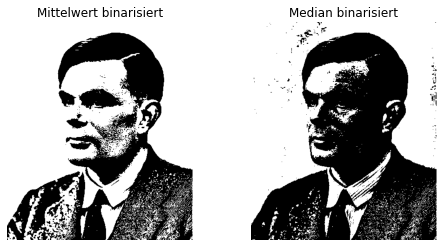

In [40]:
#copies of np-array
data_mean_bin = np.copy(data)
data_median_bin = np.copy(data)

#mean binarized
data_mean_bin[data_mean_bin <= mean]=0
data_mean_bin[data_mean_bin > mean]=1

#median binarized
data_median_bin[data_median_bin <= median]=0
data_median_bin[data_median_bin > median]=1

#display images
fig, ax = plt.subplots(1,2, figsize=(8, 4))
plot_img(data_mean_bin, "Mittelwert binarisiert", ax[0])
plot_img(data_median_bin, "Median binarisiert", ax[1])

Nein nur schwach. Da auch der Mittelwert und Median sich nicht stark unterscheiden. Wären zwischen Mittelwert und Median mehr Pixelwerte gewesen, würden sich die Bilder auch stärker unterscheiden.

### Aufgabe 6 (8 Punkte)

Berechne und zeichne für das Originalbild das normalisierte Histogramm $p(v)$, die normalisierte kumulative Verteilung der Pixelwerte $P(v)$ und den kumulativen Mittelwert $m(v)$ der Pixelwerte. Verwende *Bins* der Grösse 1 zwischen 0 und (inklusive) maximalem Bildwert. Die Funktionswerte für das normalisierte Histogramm entsprechen dabei dem Anteil Werte in einem *Bin*. Die normalisierte kumulative Verteilung entspricht dem Anteil der Pixelwerte welche den Wert $v$ oder kleiner annehmen:

\begin{equation}
P(v) = \sum_{i=0}^v p(i)
\end{equation}

Der kumulative Mittelwert ist definiert als  

\begin{equation}
m(v) = \sum_{i=0}^{v} i\cdot p(i)
\end{equation}  

Zeichne die Funktionen untereinander als Subplots in eine Figure, als Stufenfunktionen mit der `matplotlib`-Funktion `step` und berechne die kumulative Summen mit `np.cumsum`.  

Was ist der grösste Wert der kumulativen Mittelwert-Funktion? Was entspricht er? Erkläre.

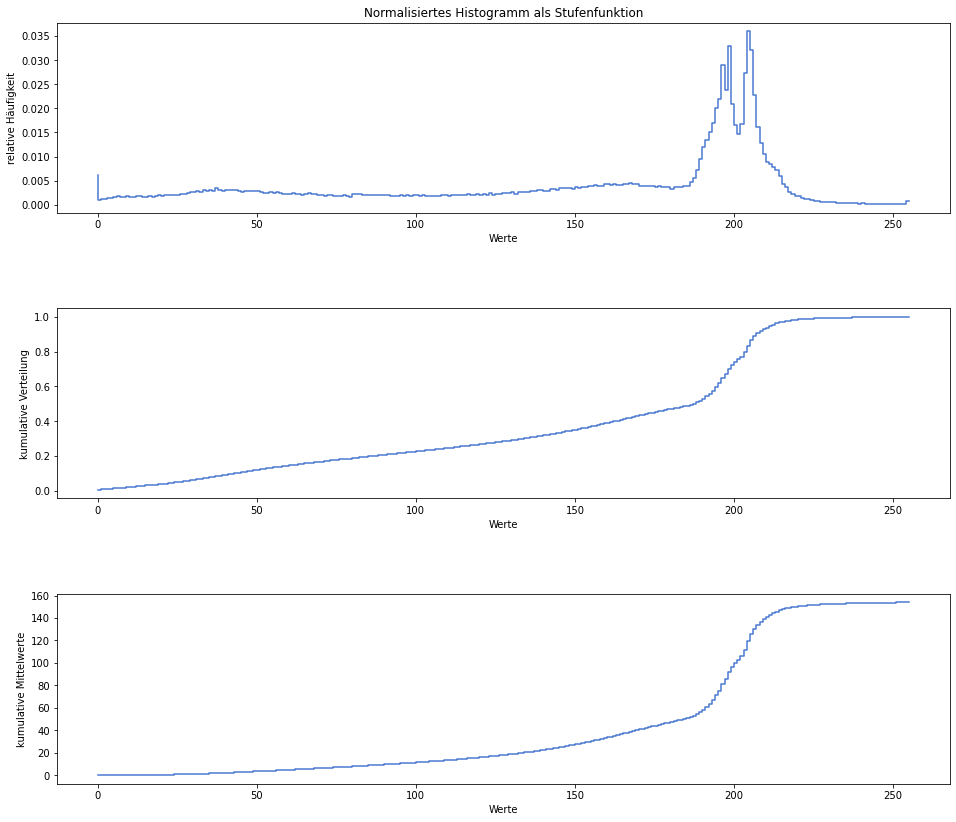

In [49]:
#normalize data
def normalize(a):
    norm = np.linalg.norm(a)
    return a/norm

#0..256
to256 = np.arange(256)

#normalized numpy-histogram - p(v)
def norm_hist(a, bins):
    hist = np.histogram(a, bins, density=True, range=(0,bins))[0] #density true, to normalize data
    return hist

#P(v)
def cum_dist_hist(a, bins):
    return np.cumsum(norm_hist(a, bins))

#m(v)
def cum_avg_hist(a, bins):
    return np.cumsum(norm_hist(a, bins) * np.arange(bins))


#display subplots as steps
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16,14),)
_ = ax[0].step(to256, norm_hist(flatten_data, 256))
_ = ax[0].set_title("Normalisiertes Histogramm als Stufenfunktion")
_ = ax[0].set_ylabel("relative Häufigkeit")
_ = ax[0].set_xlabel("Werte")
_ = ax[1].step(to256, cum_dist_hist(flatten_data, 256))
_ = ax[1].set_ylabel("kumulative Verteilung")
_ = ax[1].set_xlabel("Werte")
_ = ax[2].step(to256, cum_avg_hist(flatten_data, 256))
_ = ax[2].set_ylabel("kumulative Mittelwerte")
_ = ax[2].set_xlabel("Werte")
#add space between subplots
fig.subplots_adjust(hspace=0.5)

#highest cumulative average and its position
highest_cum_avg_pos = np.argmax(cum_avg_hist(flatten_data, 256)) #255
highest_cum_avg = cum_avg_hist(flatten_data, 256)[highest_cum_avg_pos] #154.11984574468084

Der grösste Werte der kumulativen Mittelwert-Funktion entspricht 154.11984574468084 bei v = 255. Da bei der kumulativen Mittelwert-Funktion die Werte nacheinander aufsummiert werden, befindet sich der grösste Wert immer am Ende. Dabei wird Schritt für Schritt (Wert für Wert) immer der neue Mittelwert, der bereits gelesenen Werte, berechnet. Somit erhält man am Schluss, nachdem alle Mittelwerte berechnet und aufsummiert wurden, den grössten kumulativen Mittelwert, welcher dem eigentlichen Mittelwert entspricht (sprich: Grösster kumulativer Mittelwert = Mittelwert)

### Aufgabe 7  (6 Punkte)

*Otsu's Method* (Otsu, 1979) ist ein Algorithmus zur Berechnung eines Schwellwerts für die Binarisierung von Bildern. Ziel von *Otsu's Method* ist es, die Varianz zwischen den Werten der beiden Pixelgruppen zu maximieren.  

Zur Umsetzung des Algorithmus haben wir in Aufgabe 6 schon einiges vorbereitet. Wir brauchen nämlich $p(v), P(v)$ und $m(v)$. Mit ihrer Hilfe können wir die Varianz zwischen den Pixelwerten aus den beiden Wertebereichen für einen beliebigen Schwellwert $t$ berechnen.

$$
\begin{equation}
\sigma^{2}(t) = \frac{(max(m(\cdot))P(t) - m(t))^2}{P(t)(1-P(t))}
\end{equation} 
$$

Berechnen Sie $\sigma^2(t)$ für alle möglichen $t$ und zeichnen Sie die Funktion.  

*Otsu's* Schwellwert ist bei jenem $t$ zu wählen, für welches $\sigma^2(t)$ maximal ist (sollte das Maximum nicht eindeutig sein, so wird über die verschiedenen Kandidaten gemittelt).  


Schreiben Sie nun eine Funktion `otsu_threshold(image)`, welche den Otsu Schwellwert für ein beliebiges Graustufenbild berechnet.

Was ist *Otsu's* Schwellwert für unser Originalbild? 

Otsu's Schwellwert lautet: 3279.3458507781443



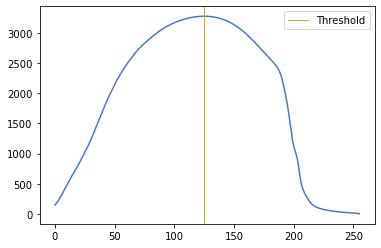

In [7]:
def otsu_threshold(image):
    
    #flatten image if necessarry
    if(image.ndim > 1):
        image = image.flatten()
    
    #calc all thresholds (based on the above formula) and store them in a numpy-array
    allThresholds = np.asarray( ((cum_avg_hist(image, 256)[-1] * cum_dist_hist(image, 256) - cum_avg_hist(image, 256))**2)/(cum_dist_hist(image, 256)*(1 - cum_dist_hist(image, 256))) )

    #get max threshold and its positions
    maxThreshold = np.amax(allThresholds)
    maxThresholdPositions = np.where(allThresholds == maxThreshold)
    
    #check multiple positions
    if(len(maxThresholdPositions)>1):
        maxThresholdPos = np.mean(maxThresholdPositions)
    else:
        maxThresholdPos = maxThresholdPositions
    
    return (maxThreshold, maxThresholdPos), allThresholds


otsu, threshold_data = otsu_threshold(data)

#plot threshold
plt.plot(to256, threshold_data)
plt.axvline(otsu[1], color="goldenrod", linewidth=1, label="Threshold")
plt.legend()


print("Otsu's Schwellwert lautet: "+str(otsu[0])+"\n")    

### Aufgabe 8 (5 Punkte)

Zeichne erneut ein Histogramm und dazu Mittelwert, Median und *Otsu's* Schwellwert als vertikale Linien.  

Zeichne dann ein Bild welches mit *Otsu's* Schwellwert binarisiert wurde.  

Was stellst du fest? Beschreibe deine Erkenntnisse.

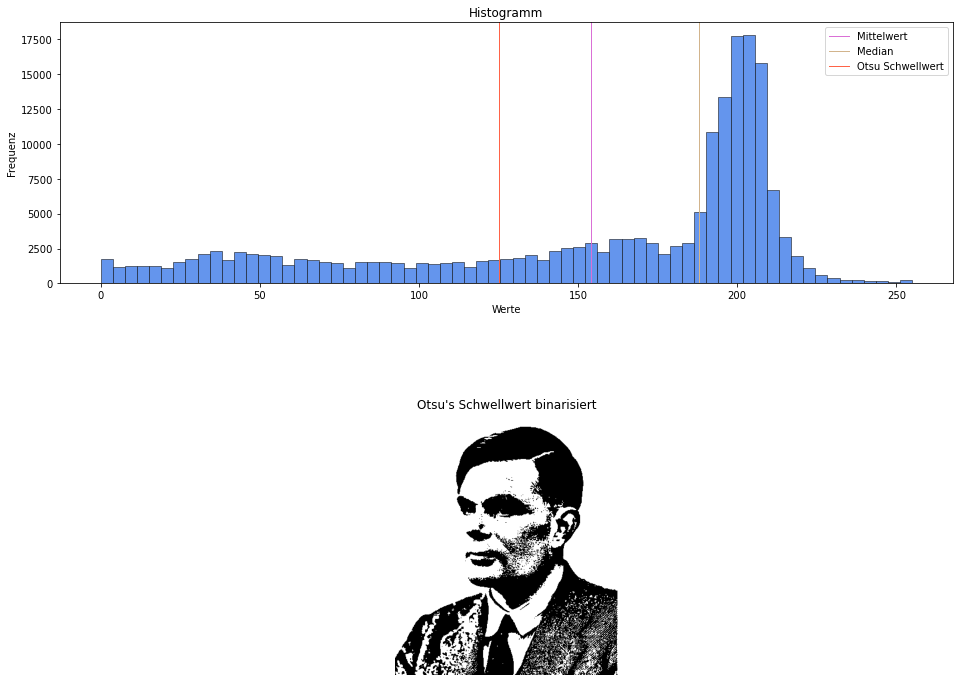

In [50]:
#get otsu threshold
otsu_threshold = otsu[1]

#histogram
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,12))
_ = ax[0].hist(flatten_data, bins="scott", color="cornflowerblue", edgecolor="black", linewidth=0.5)
_ = ax[0].set_title("Histogramm")

#add space between subplots
fig.subplots_adjust(hspace=0.5)

#show mean, median and otsu's threshold as vertical line
_ = ax[0].axvline(mean, color="orchid", linewidth=1, label="Mittelwert")
_ = ax[0].axvline(median, color="tan", linewidth=1, label="Median")
_ = ax[0].axvline(otsu_threshold, color="tomato", linewidth=1, label="Otsu Schwellwert")

# show histogram legend
_ = ax[0].legend()

# histogram labels
_ = ax[0].set_ylabel("Frequenz")
_ = ax[0].set_xlabel("Werte")

#binarize image with otsu's threshold and display it
data_otsu = np.copy(data)
data_otsu[data_otsu <= otsu_threshold]=0
data_otsu[data_otsu > otsu_threshold]=1

#display image
plot_img(data_mean_bin, "Otsu's Schwellwert binarisiert", ax[1])

YOUR ANSWER HERE

### Aufgabe 9 (6 Punkte)

In dieser Aufgabe schauen wir uns sogenannte Filter-Operationen an. Filter-Operationen sind ein Werkzeug aus der Bildverarbeitung. Dabei wird ein quadratisches Zahlenraster, der sogenannte Kernel, benutzt um die Pixelwerte eines Bildes zu verändern. 

<!-- ![image.png](attachment:761091b2-d52b-49f2-9ed3-bc8e22c92c62.png) -->

<!-- ![](convolution.png) -->


<img src="convolution.png" style="width:650px" />


In der Abbildung sieht man am Beispiel eines 3x3 Kernels, wie die neuen Pixelwerte $f_{ij}$ aus den alten pixelwerten $p_{ij}$ sowie den den Einträgen des Kernels $a_{ij}$ errechnet werden. Für eine anschauliche Erklärung wie eine Filteroperation von statten geht kannst du dir [dieses Computerphile Video anschauen](https://www.youtube.com/watch?v=C_zFhWdM4ic)



#### Box-Filter

Ein Boxfilter ist ein sehr simpler Blur-Filter. Dabei hat jeder Eintrag im Kernel den Wert $\frac{1}{n}$ wobei $n$ für die Anzahl Einträge im Kernel steht. Bei einem 3x3 Box-Filter wären alle einträge $\frac{1}{9}$.

Schreibe eine Funktion, welche eine ganze Zahl n als Argument entgegen nimmt und einen Box-Filter-Kernel der grösse nxn als numpy array zurück gibt. Dann benutze diese Funktion um das Turing-Bild mit einem 5x5, einem 9x9 und einem 15x15 Box-Filter zu bearbeiten. benutze dazu die funktion convolve2d von scipy. Dann plotte die drei resultierenden Bilder. Worin unterscheiden sich die Bilder? Und warum?

In [9]:
#create nxn-matrix with all values equal to 1/n
def box_filter(n):
    return np.full((n,n), 1/n)

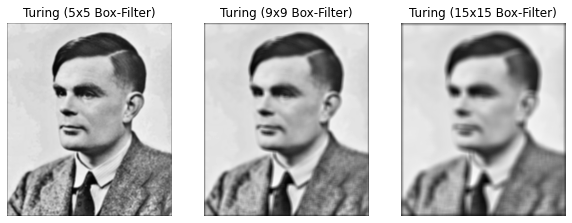

In [47]:
from scipy.signal import convolve2d

#apply box filter on images (using convolve2d)
img_box_5 = convolve2d(img, box_filter(5), mode='same')
img_box_9 = convolve2d(img, box_filter(9), mode='same')
img_box_15 = convolve2d(img, box_filter(15), mode='same')

#display images
fig, ax = plt.subplots(1,3, figsize=(10,4))
plot_img(img_box_5, "Turing (5x5 Box-Filter)", ax[0])
plot_img(img_box_9, "Turing (9x9 Box-Filter)", ax[1])
plot_img(img_box_15, "Turing (15x15 Box-Filter)", ax[2])

Die Bilder unterscheiden sich in ihrer Schärfe bzw. Unschärfe. Je grösser die Zahl n gewählt wird, desto grösser wird der Kernel (da nxn), und desto kleiner die Werte im Kernel (da 1/n für jeden Wert). Je grösser ein Kernel ist (und je kleiner somit dessen Werte), desto weniger Unterscheiden sich letztendlich die benachbarten Pixel, was zum sog. Blur-Effekt führt. Folgende selbstgemachte Skizze veranschaulicht dies nochmals: 
</br><img src="aufgabe8_skizze.png" width=400 height=400 />

### Aufgabe 10 (5 Punkte)

Nun implementieren wir eine Filter-Operation von Hand. Programmiere eine Funktion, welche ein Graustufenbild sowie einen 3x3 Kernel entgegen nimmt, dann den Kernel auf das Bild anwendet und schliesslich das resultierende Bild zurück gibt. Benutze dazu <b>keine</b> vorgefertigte Funktion wie convolve2d welche die Convolution für dich implementiert. Einfache Array-Operationen von Numpy darfst du verwenden.

Benutze nun diese Funktion, um den folgenden Kernel auf das Bild von Alan Turing anzuwenden:

$$
kernel = 
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

<!-- <img src="edge_filter_hor.png" style="width:120px" /> -->

Plotte das Resultierende Bild. Der Kernel ist ein Kantendetektionsfilter. Warum erscheinen einige Kanten dunkel aber andere Hell?

In [11]:
def convolution(image, kernel):
    
    #init result as empty image (using same scale as the original image)
    result = np.empty(image.shape)
    
    #pad array with edge values
    img_padded = np.pad(image, 1, "edge")
    
    #loop through image
    #always start from second position, and end in second last position
    #so only the actual image values are iterated (w/o the pad values at the edges)
    for x in range(1, len(img_padded)-1):
        for y in range(1, len(img_padded[x])-1):
            
            #create 3x3 slice of the image
            img_slice = img_padded[x-1:x+2, y-1:y+2]
            
            #create new 3x3 slice muliplying the img_slice and the kernel
            new_slice = np.multiply(img_slice, kernel)
            
            #get new pixel value summing up the values in new_slice
            new_value = np.sum(new_slice)
            
            #set new pixel value (starting with [0][0])
            result[x-1][y-1] = new_value

    return result

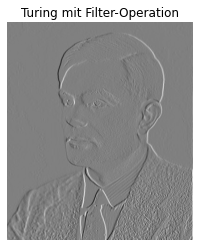

In [45]:
#init kernel
kernel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

#display new image
convolution_image = convolution(img, kernel)

fig, ax = plt.subplots(1,1, figsize=(10,4))
plot_img(convolution_image, "Turing mit Filter-Operation", ax)

Bemerkung: Wie im Video von Computerphile erwähnt, kann man bei den Werten am Rand entscheiden ob man die nicht vorhandenen Pixel - zum Anwenden der Filter-Operation - ignorieren, sie mit Kanten-Werten auffüllen, sie mit dem Bild umhüllen, oder anderes probieren will. In diesem Beispiel habe ich die Ränder mit den Kantenwerten aufgefüllt.

Dies liegt daran dass wir im Kernel jeweils negative und positive Werte haben. Dabei resultieren negative Werte im Ausgangsbild zu dunkleren Kanten, und positive Werte zu helleren Kanten. Dies ist auch abhängig von der Ausrichtung der Kante.

### Aufgabe 11 (6 Punkte)
Nun führen wir eine Kanten-Detektion mit dem sogenanten Sobel-Operator durch. Dabei werden die horizontalen und die Vertikalen Kanten einzeln detektiert und danach in einem Bild zusammengebracht.

Dazu verwendet man die folgenden beiden Kernel:

$$
G_x = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

$$
G_y = 
\begin{bmatrix}
-1 & -2 & -1 \\
0  & 0  & 0 \\
1  & 2  & 1 \\
\end{bmatrix}
$$
<!-- 
<img src="sobel_kernel.gif" style="width:300px" /> -->

$Gx$ detektiert die vertikalen Kanten und $Gy$ die horizontalen. Nehmen wir an, das Resultat der Faltung mit $Gy$ heisst 'ResY' und das Resultat der Faltung mit $Gx$ 'ResX'. Dann wird das final resultierende Bild der Sobel-Kantendetektion mit folgender pixelweisen Operation berechnet:

$result = \sqrt{ResX^2 + ResY^2}$

Auch zur Sobel-Kantendetektion gibt es ein [Computerphile video](https://www.youtube.com/watch?v=uihBwtPIBxM&t=70s)

Schreibe eine Funktion, welche ein Bild als Numpy-Array entgegennimmt, die Sobel-Kantendetektion durchführt und das Resultat wiederum als Numpy-Array zurück gibt. Benutze für die Filterdetektion deine Funktion aus Aufgabe 10. Führe dann eine Sobel-Kantendetektion auf dem Bild von Alan Turing aus und plotte das Resultat.

Der Kernel aus Aufgebe 10 enthielt nur die Zahlen -1, 0 und 1. $Gx$ enthält aber auch noch jeweils eine -2 und eine 2. Wie verändert dieser Unterschied die Faltungsoperation?

Warum wurde das Schlussresultat der Sobel-Kantendetektion mit der obigen Formel und nicht einfach durch $result = ResX + ResY$ berechnet? Wozu dienen das Quadrieren und das Ziehen der Wurzel?

In [13]:
def sobel(img):
    
    #init Gx and Gy
    Gx = [[-1,0,1],[-2,0,2],[-1,0,1]]
    Gy = [[-1,-2,-1],[0,0,0],[1,2,1]]
    
    #calc resX and resY using convolution from task 10
    resX = convolution(img, Gx)
    resY = convolution(img, Gy)
    
    #calc result using result-operation from text above
    result = np.sqrt((resX**2)+(resY**2))
    
    return result

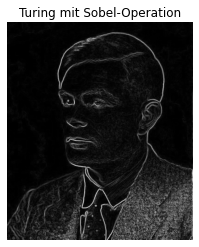

In [46]:
#display sobel image
sobel_img = sobel(img)

fig, ax = plt.subplots(1,1, figsize=(10,4))
plot_img(sobel_img, "Turing mit Sobel-Operation", ax)

resX und resY ergeben zusammen einen 2D Vektor. Für die Kantendetektion ist jedoch der Betrag des Vektors wichtig, heisst wir müssen seine Länge berechnen. Und die Betragsfunktion 
\begin{equation}
\sqrt{resX^2 + resY^2}
\end{equation}
 berechnet nun genau diese Länge des Vektors